In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import collections
import lmfit as lm
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })
%matplotlib notebook
%matplotlib notebook

In [2]:
loadnames = ['2_PumpC_07deg_Si29_TiSap855p6pumpC_CTL925_VA24_LF_2pecho.mat']
loadnames2 = ['5_TiSapp_TwoColor_07deg_Si29_TiSap820_CTL946p7PumpC_VA24_LF']
PumpCData = collections.defaultdict(dict)
    
datain = sio.loadmat(loadnames[0])
keynameTau = list(datain.keys())[3]
keynameBgI = list(datain.keys())[-2]
keynameI = list(datain.keys())[-4]
Tau = datain[keynameTau].flatten()
SpinPol = datain[keynameI].flatten()-datain[keynameBgI].flatten()
    
PumpCData['855.6']['Time'] = Tau[0:33]/1e9 # Time in unit of S
PumpCData['855.6']['SpinPol'] = SpinPol[0:33]/268.7532679585839 *2.7

datain = sio.loadmat(loadnames2[0])
keynameTau = list(datain.keys())[3]
keynameBgI = list(datain.keys())[-2]
keynameI = list(datain.keys())[-4]
Tau = datain[keynameTau].flatten()
SpinPol = datain[keynameI].flatten()-datain[keynameBgI].flatten()
    
PumpCData['946.7']['Time'] = Tau[0:39]/1e9 # Time in unit of S
PumpCData['946.7']['SpinPol'] = SpinPol[0:39]/5000*35

In [2]:
E = 0.03999 #meV
EB =  0.08617 #meV, Boltzmann constant * 1 kelvin
Spol = (1-np.exp(-E/EB/5.5))/(1+np.exp(-E/EB/5.5)+np.exp(E/EB/5.5))


In [24]:
np.shape(Tau)

(40,)

[[Model]]
    Model(doubleExp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 33
    # variables        = 5
    chi-square         = 0.31548511
    reduced chi-square = 0.01126733
    Akaike info crit   = -143.454995
    Bayesian info crit = -135.972457
[[Variables]]
    a1:  22.8382414 +/- 1.16936789 (5.12%) (init = 30)
    a2:  23.1312681 +/- 0.98100331 (4.24%) (init = 10)
    b1:  0.24909522 +/- 0.00823755 (3.31%) (init = 1)
    b2:  0.07399847 +/- 0.00363334 (4.91%) (init = 2)
    c:   46.1780133 +/- 0.04677525 (0.10%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, b1) =  0.971
    C(a1, a2) = -0.967
    C(a1, b1) = -0.965
    C(a1, b2) = -0.958
    C(b1, b2) =  0.878
    C(a2, b2) =  0.859
    C(b1, c)  =  0.662
    C(a2, c)  =  0.566
    C(a1, c)  = -0.508
    C(b2, c)  =  0.429

[[Model]]
    Model(doubleExp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    

<IPython.core.display.Javascript object>


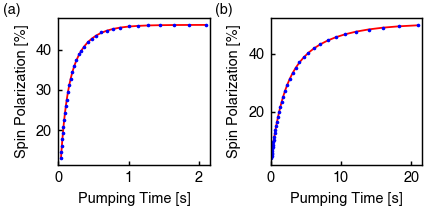

In [38]:
mm = 1/25.4
def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

def doubleExp(x,a1,a2,b1,b2,c):
    return c - a1* np.exp(-x/b1) - a2 * np.exp(-x/b2)

expmodel = lm.Model(doubleExp)
result = expmodel.fit(PumpCData['855.6']['SpinPol'], x=PumpCData['855.6']['Time'], a1=30, a2=10, b1=1, b2 = 2, c = 50)
print(result.fit_report())
result2 = expmodel.fit(PumpCData['946.7']['SpinPol'], x=PumpCData['946.7']['Time'], a1=30, a2=10, b1=1, b2 = 2, c = 50)
print(result2.fit_report())

fig,ax = plt.subplots(1,2,figsize=(86*mm, 86/2*mm))
ax[0].tick_params(direction='in',length = 2)
ax[0].plot(PumpCData['855.6']['Time'],PumpCData['855.6']['SpinPol'],'bo',ms = 1)
ax[0].plot(PumpCData['855.6']['Time'], result.best_fit, 'r-', label='best fit',zorder=-1,linewidth = 1)
ax[0].set_xlabel("Pumping Time [s]")
ax[0].set_ylabel("Spin Polarization [%]")
ax[0].text(-0.25, 1.1, '(a)', transform=ax[0].transAxes, va='top', ha='right')
#ax.set_xscale('log')
ax[0].set_xlim([0,2.15])

ax[1].plot(PumpCData['946.7']['Time'],PumpCData['946.7']['SpinPol'],'bo',ms = 1)
ax[1].plot(PumpCData['946.7']['Time'], result2.best_fit, 'r-', label='best fit',zorder=-1,linewidth = 1)
ax[1].tick_params(direction='in',length = 2)
ax[1].set_xlabel("Pumping Time [s]")
ax[1].set_ylabel("Spin Polarization [%]")
ax[1].text(-0.25, 1.1, '(b)', transform=ax[1].transAxes, va='top', ha='right')
#ax.set_xscale('log')
ax[1].set_xlim([0,21.5])
#ax.legend(loc = 'best',framealpha = 0)
plt.tight_layout()
fig1 = plt.gcf()
plt.show()
fig1.savefig('SatPump.pdf', format='pdf')